# Habermans-survival- Data sets 

## Description
'''The dataset contains cases from a study that was conducted between 1958 and 1970 
at the University of Chicago's Billings Hospital on the survival of patients who had 
undergone surgery for breast cancer.
Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient 
died within 5 year
'''

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

''' WE AN DWOWNLOAD DATA FROM https://www.kaggle.com/gilsousa/habermans-survival-data-set'''

' WE AN DWOWNLOAD DATA FROM https://www.kaggle.com/gilsousa/habermans-survival-data-set'

In [154]:
DATA = pd.read_csv('haberman (1).csv')
print(DATA.head(10))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1


In [155]:
# no of data point and features are
print(DATA.shape)

(306, 4)


In [156]:
# column names in our data set
print(DATA.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [157]:
# How many patients survived more than 5 years and patient died before 5 years after operaation
# denoted by 1 and 2 
print(DATA['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


### Observation
''' above result shows that this is an imbalanced dataset and people survived more than 5 years
 are more than than who died within 5 years'''

## Objective 
'''  Our objective is to visualize and analyse our data 
and know which features are more useful or which features impact less
     by comparing them using various visualization techniques in 1D , 2D ,3D 
     and classify them'''

# 1D plots

## 1-D Scatter plots

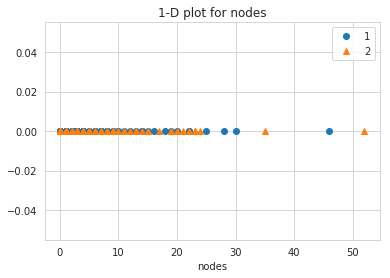

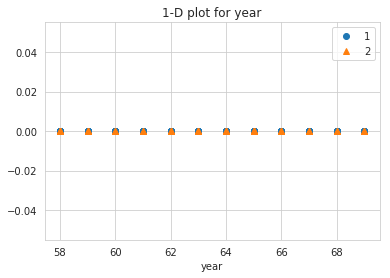

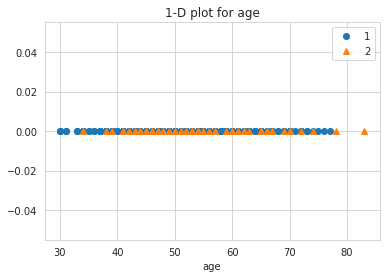

In [158]:


attribute1 = DATA[DATA['status']==1]
attribute2 = DATA[DATA['status']==2]

plt.plot(attribute1['nodes'], np.zeros_like(attribute1['nodes']), 'o')
plt.plot(attribute2['nodes'], np.zeros_like(attribute2['nodes']), '^')
plt.xlabel('nodes')
plt.title('1-D plot for nodes')
plt.legend(('1','2'))
plt.show()
plt.plot(attribute1['year'], np.zeros_like(attribute1['year']), 'o')
plt.plot(attribute2['year'], np.zeros_like(attribute2['year']), '^')
plt.xlabel('year')
plt.title('1-D plot for year')
plt.legend(('1','2'))
plt.show()
plt.plot(attribute1['age'], np.zeros_like(attribute1['age']), 'o')
plt.plot(attribute2['age'], np.zeros_like(attribute2['age']), '^')
plt.xlabel('age')
plt.title('1-D plot for age')
plt.legend(('1','2'))
plt.show()

### Observation
''' for 1D scatter plot  :   In plot 1 sill we can classify on the basis 
    of number of nodes by drawing a line at around 25 , In plot 2 the year attribute does
    not make any sense and in case of plot 3 that is attribute age does not make much sense
    so that we can classify it.
    Note: we cannot classify perfectly with attribute nodes too.
    Here we can also say that 1D scatter plot is not a good way of visualizing for atleast
    on this data set as there are more overlapping points. '''

## Histograms and PDF(Probability Density Funcftion)

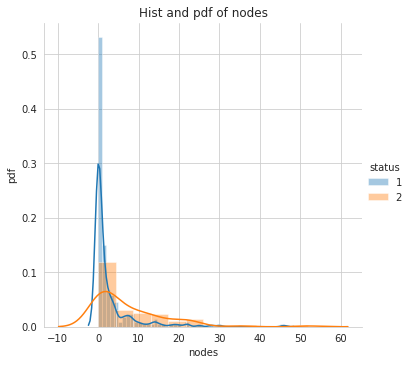

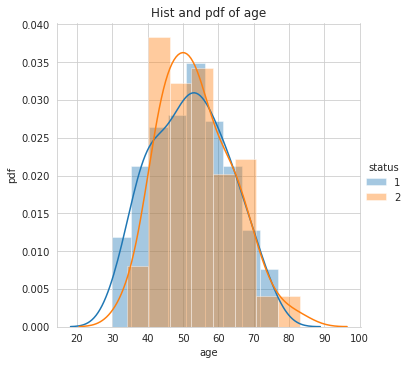

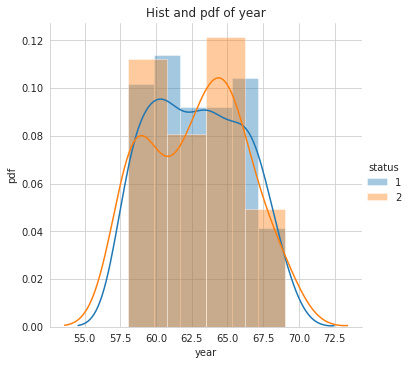

In [159]:
sns.FacetGrid(DATA, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('pdf')
plt.title('Hist and pdf of nodes')
plt.show();
sns.FacetGrid(DATA, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('pdf')
plt.title('Hist and pdf of age')
plt.show();
sns.FacetGrid(DATA, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('pdf')
plt.title('Hist and pdf of year')
plt.show();

### Observations
'''  We cannot make any conclusion from these three plots as for 
    all attributes the histograms and pdf are overlapped and in no way it can be
    classified or breakdown into an if statement '''

## CDF (Cumulative Distribution Function)  using cdf we can see what percentage  of 
##  surviors or non survivors have age less than say 30 or Node less than say 5'''

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


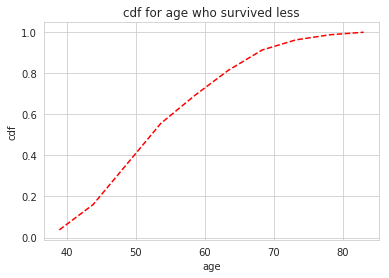

In [160]:
counts,bin_edges = np.histogram(attribute2['age'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,'r--')
plt.xlabel('age')
plt.ylabel('cdf')
plt.title('cdf for age who survived less')
plt.show()


### Observation
 WE can see that the patients who died within 5 years are mostly in the age interval of 55-80
 almost 50% of the people who died within 5 years are in this age interval 
 we can say that the age could be the factor of more deaths

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


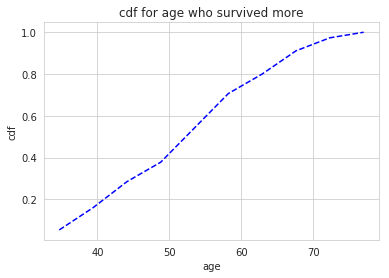

In [161]:
counts,bin_edges = np.histogram(attribute1['age'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,'b--')
plt.xlabel('age')
plt.ylabel('cdf')
plt.title('cdf for age who survived more')
plt.show()


### Observation

 From this plot we can see that most of the people who lived longer than 5 years 
 are less than 65 years old so from the above graph we can conclude that the most specifically
 people with age intervall of 65-80 didn't live longer than 5

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


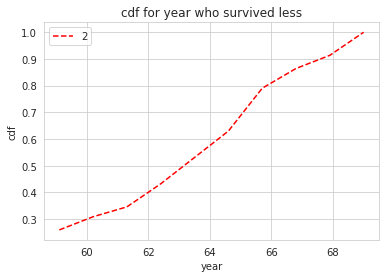

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


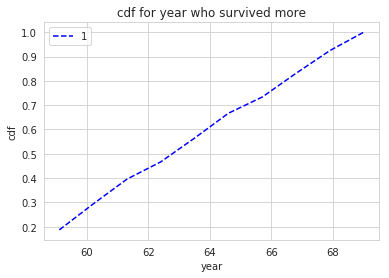

In [162]:
counts,bin_edges = np.histogram(attribute2['year'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,'r--')
plt.xlabel('year')
plt.ylabel('cdf')
plt.title('cdf for year who survived less')
plt.legend('2')
plt.show()
counts,bin_edges = np.histogram(attribute1['year'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,'b--')
plt.xlabel('year')
plt.ylabel('cdf')
plt.title('cdf for year who survived more')
plt.legend('1')
plt.show()

### Observation
''' From the upper two cdf plots for year we can see a close to linear relation 
    which can make us say that year didn't effect and we can't make any conclusion
    for this'''

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


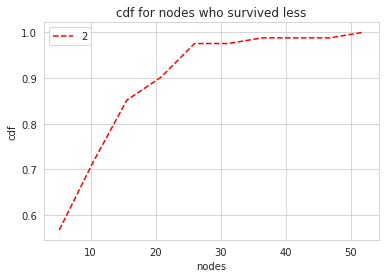

In [163]:

counts,bin_edges = np.histogram(attribute2['nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,'r--')
plt.xlabel('nodes')
plt.ylabel('cdf')
plt.title("cdf for nodes who survived less")
plt.legend('2')
plt.show()


## Observation
 In this plot we can say that most of the people approximately 90% died before five
 years of treatment have nodes less than 25

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


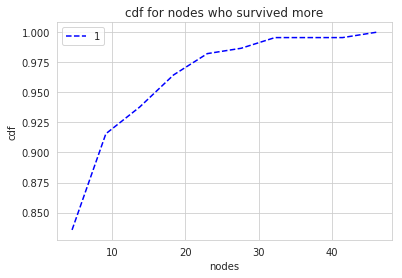

In [164]:
counts,bin_edges = np.histogram(attribute1['nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,'b--')
plt.xlabel('nodes')
plt.ylabel('cdf')
plt.title("cdf for nodes who survived more")
plt.legend('1')
plt.show()

## Observation
''' From this plot we can say that most of the people having nodes less than 10
    survived more than 5 years after treatment and from the above graph we 
    can conclude that people having nodes between 10-25 are more likely to die before 
     5 years of treatment '''

# MEANS

In [165]:

print('Means for patients survived longer than 5 years')
print('1:',np.mean(attribute1['age']))
print('2:',np.mean(attribute1['year']))
print('3:',np.mean(attribute1['nodes']))
print('*'*30)
print("Means for patients survived less than 5 years")
print('1:',np.mean(attribute2['age']))
print('2:',np.mean(attribute2['year']))
print('3:',np.mean(attribute2['nodes']))


Means for patients survived longer than 5 years
1: 52.01777777777778
2: 62.86222222222222
3: 2.7911111111111113
******************************
Means for patients survived less than 5 years
1: 53.67901234567901
2: 62.82716049382716
3: 7.45679012345679


## Observation

This concludes on an average patients survived more than 5 years have around 2-3 nodes
 and the one  deid within 5 years have around 7-8 nodes

# Std-deviation

In [166]:

print("Std-deviation for patients survived longer than 5 years")
print('1',np.std(attribute1['age']))
print('2',np.std(attribute1['year']))
print('3',np.std(attribute1['nodes']))
print('*'*30)
print("Std-deviation for patients survived less than 5 years")
print('1',np.std(attribute2['age']))
print('2',np.std(attribute2['year']))
print('3',np.std(attribute2['nodes']))


Std-deviation for patients survived longer than 5 years
1 10.987655475100508
2 3.2157452144021947
3 5.857258449412138
******************************
Std-deviation for patients survived less than 5 years
1 10.104182193031312
2 3.3214236255207887
3 9.128776076761635


# Median

In [167]:
print("Median for patients survived longer than 5 years")
print('1',np.median(attribute1['age']))
print('2',np.median(attribute1['year']))
print('3',np.median(attribute1['nodes']))
print('*'*30)
print("Median for patients survived less than 5 years")
print('1',np.median(attribute2['age']))
print('2',np.median(attribute2['year']))
print('3',np.median(attribute2['nodes']))


Median for patients survived longer than 5 years
1 52.0
2 63.0
3 0.0
******************************
Median for patients survived less than 5 years
1 53.0
2 63.0
3 4.0


## Oservation

 Here we can see that the one who survived more than five years have median=0
 which means half of the patient who survived have no nodes and this can be said to be a 
 huge cuuse of survival of the patients

# Quantile

In [168]:
print("Quantiles for patients survived longer than 5 years")
print('1',np.percentile(attribute1['age'],np.arange(0,100,25)))
print('2',np.percentile(attribute1['year'],np.arange(0,100,25)))
print('3',np.percentile(attribute1['nodes'],np.arange(0,100,25)))
print('*'*30)
print("Quantiles for patients survived less than 5 years")
print('1',np.percentile(attribute2['age'],np.arange(0,100,25)))
print('2',np.percentile(attribute2['year'],np.arange(0,100,25)))
print('3',np.percentile(attribute2['nodes'],np.arange(0,100,25)))


Quantiles for patients survived longer than 5 years
1 [30. 43. 52. 60.]
2 [58. 60. 63. 66.]
3 [0. 0. 0. 3.]
******************************
Quantiles for patients survived less than 5 years
1 [34. 46. 53. 61.]
2 [58. 59. 63. 65.]
3 [ 0.  1.  4. 11.]


## Observation
 Here we can see most of the patient more than 75% who survived more than 5  years have
 no nodes ie nodes=0.0 which shows nodes plays a significant role in determing patients 
 who survived more 

# 90th percentile

In [169]:
print("90th pecentile for patients survived longer than 5 years")
print('1',np.percentile(attribute1['age'],90))
print('2',np.percentile(attribute1['year'],90))
print('3',np.percentile(attribute1['nodes'],90))
print('*'*30)
print("90th percentile for patients survived less than 5 years")
print('1',np.percentile(attribute2['age'],90))
print('2',np.percentile(attribute2['year'],90))
print('3',np.percentile(attribute2['nodes'],90))

90th pecentile for patients survived longer than 5 years
1 67.0
2 67.0
3 8.0
******************************
90th percentile for patients survived less than 5 years
1 67.0
2 67.0
3 20.0


# Median Absolute Deviation

In [170]:
from statsmodels import robust
print("Median absolute deviation for patients survived longer than 5 years")
print('1',robust.mad(attribute1['age']))
print('2',robust.mad(attribute1['year']))
print('3',robust.mad(attribute1['nodes']))
print('*'*30)
print("Median absolute deviation for patients survived less than 5 years")
print('1',robust.mad(attribute2['age']))
print('2',robust.mad(attribute2['year']))
print('3',robust.mad(attribute2['nodes']))

Median absolute deviation for patients survived longer than 5 years
1 13.343419966550417
2 4.447806655516806
3 0.0
******************************
Median absolute deviation for patients survived less than 5 years
1 11.860817748044816
2 4.447806655516806
3 5.930408874022408


## BOX PLOT AND WHISKERS  
 in this a technique called inter-quantile range is used in plotting 
 the whiskers in the plot maybe corresponds to min-max value or 1.5*IQR
 3 lines corresponding to mthe colored box are quantiles ie 75th,50th,25th percentile 

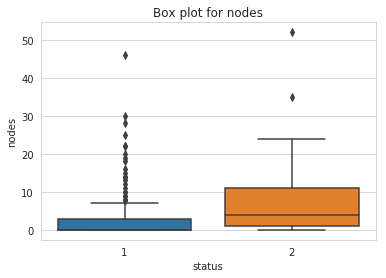

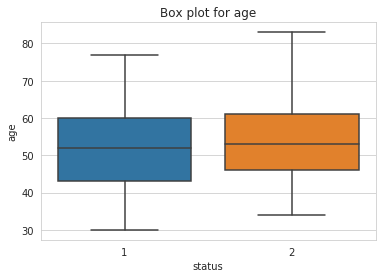

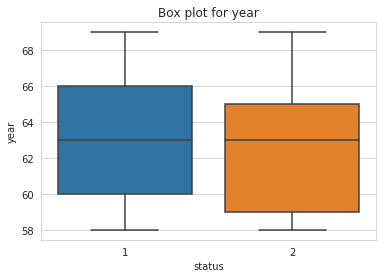

In [171]:
sns.boxplot(x='status',y='nodes',data=DATA)
plt.title("Box plot for nodes")
plt.show()
sns.boxplot(x='status',y='age',data=DATA)
plt.title("Box plot for age")
plt.show()
sns.boxplot(x='status',y='year',data=DATA)
plt.title("Box plot for year")
plt.show()

### Observation 
 From the above three box plots we cannot say anything about age and years as the box plot for
 them are almost overlapping but for nodes we can say that 
 if nodes>0 patient died within 5 years of operation
 else he survived more than 5 

## VIOLIN PLOT     
 It combines the benefit of pds and box plots and simplifies them 
 Denser region of the data are fatter and sparse ones thinner and the thick black area
 in the middle is box plots and edges are  whiskers

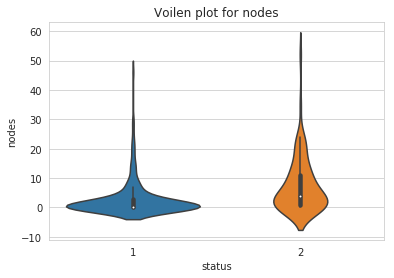

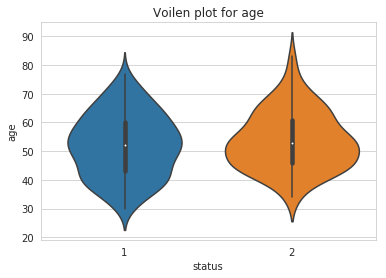

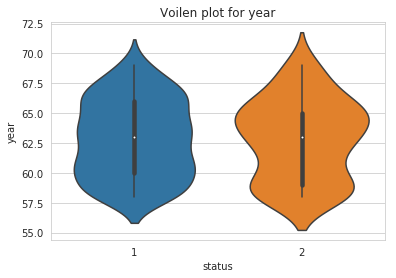

In [172]:
sns.violinplot(x='status',y='nodes',data=DATA)
plt.title("Voilen plot for nodes")
plt.show()
sns.violinplot(x='status',y='age',data=DATA)
plt.title("Voilen plot for age")
plt.show()
sns.violinplot(x='status',y='year',data=DATA)
plt.title("Voilen plot for year")
plt.show()

# 2-D plots      

## 2-D colored scatter plot

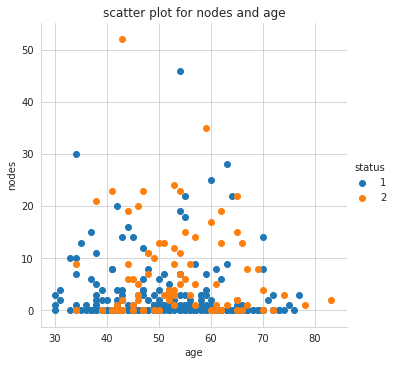

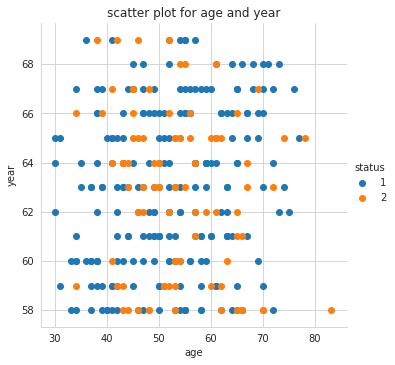

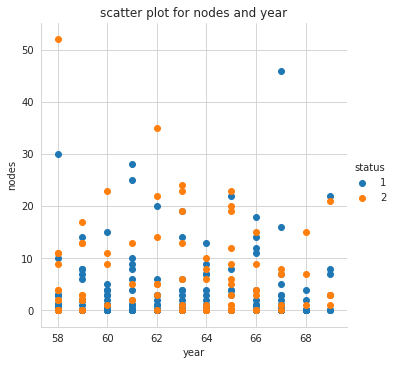

In [173]:
sns.set_style("whitegrid")
sns.FacetGrid(DATA,hue="status",height=5).map(plt.scatter,"age","nodes").add_legend()
plt.title("scatter plot for nodes and age")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(DATA,hue="status",height=5).map(plt.scatter,"age","year").add_legend()
plt.title("scatter plot for age and year")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(DATA,hue="status",height=5).map(plt.scatter,"year","nodes").add_legend()
plt.title("scatter plot for nodes and year")
plt.show()

### Observation
from above three scatter plot we cannot conclude anything

# PAIR-PLOT

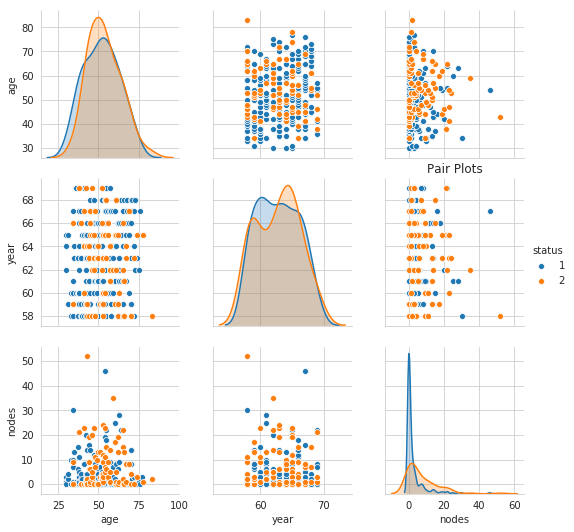

In [174]:
plt.close()
sns.set_style("whitegrid")
survival_stat=DATA[['status']]
sns.pairplot(DATA,vars=['age','year','nodes'],hue='status')
plt.title("Pair Plots")
plt.show()



### Observation
from the pair plots below we cannot make any conclusion due to overlapping

# CONTOUR PROBABILITY DENSITY PLOT  IT HELPS US IN SHOWING 2-D DENSITY 

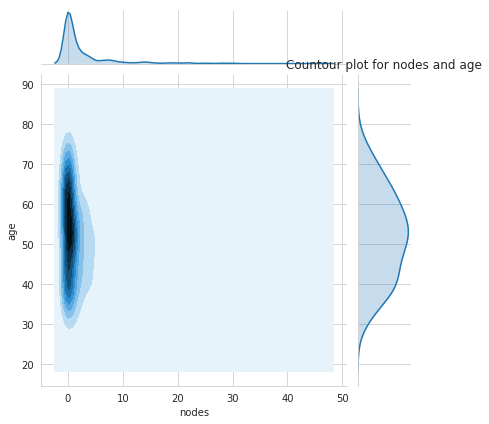

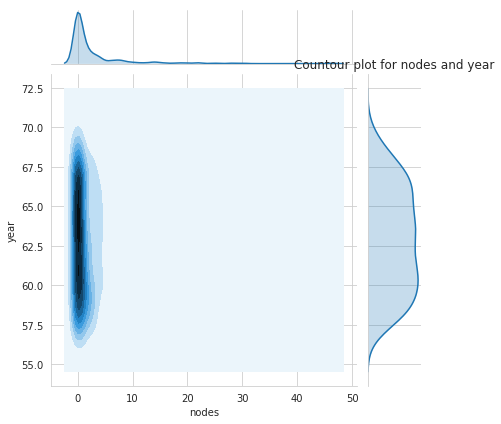

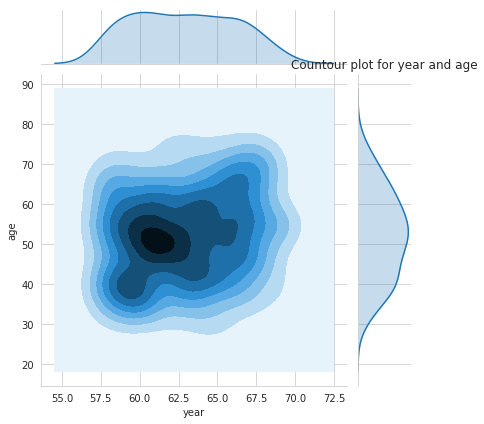

In [175]:
sns.jointplot(x="nodes",y='age',data=attribute1,kind='kde')
plt.title("Countour plot for nodes and age")
plt.show()
sns.jointplot(x="nodes",y='year',data=attribute1,kind='kde')
plt.title("Countour plot for nodes and year")
plt.show()
sns.jointplot(x="year",y='age',data=attribute1,kind='kde')
plt.title("Countour plot for year and age")
plt.show()

## Observation  
 Here the darkest region tells us that there  are maximum number of points
 in that region considering last graph we can say that approximately most of the point lies
 in interval where year is between 1961-1963 and with age between 48-55 which means more
 survivor in that region

# Conclusion

Through all the analysis of the data we can come to a final conclusion that since our data is
too much overlapping so for any feature we cannot devide them into corresponding attributes 
but through our analysis have noticed some features like no. of nodes is one of the most 
important feature for our data as we have seen that almost 75-80% who survived more
than 5 yeas have no nodes and in terms of age the important conclusion we can make is 
people having age of around 65-80 are more likely to die before  years of the treatment